<a href="https://colab.research.google.com/github/Avnish3909/Mask-Detection-CNN/blob/main/Deep_Learning_Mask_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Prepare a detailed python notebook using CNNfor detecting Face Masks in Real-time**

Import Required Libraries

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from google.colab import drive
import zipfile

**Load and Pre-process the dataset**
Pre-process the images present in the dataset using the TensorFlow preprocessing module

Encode the categorical data using an encoder of your choice because Machine Learning algorithms can only understand numerical data

Split the data into training and testing set using sklearn’s train_test_splitfunction

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import zipfile

zip_file_path = 'dataset.zip'
extraction_path = '/content'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder

dataset_path="/content/dataset"
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 1101 images belonging to 2 classes.
Found 275 images belonging to 2 classes.


In [ ]:

labels = []
for subdir in os.listdir(dataset_path):
    if os.path.isdir(os.path.join(dataset_path, subdir)):
        labels.append(subdir)

labels = ['with_mask' if label == 'with_mask' else 'without_mask' for label in labels]

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

file_paths = []
all_labels = []
for subdir in os.listdir(dataset_path):
    if os.path.isdir(os.path.join(dataset_path, subdir)):
        label = 'with_mask' if subdir == 'with_mask' else 'without_mask'
        subdir_path = os.path.join(dataset_path, subdir)
        for filename in os.listdir(subdir_path):
            file_paths.append(os.path.join(subdir_path, filename))
            all_labels.append(label)



In [ ]:
from sklearn.model_selection import train_test_split

file_paths = np.array(file_paths)
all_labels = np.array(all_labels)

X_train, X_test, y_train, y_test = train_test_split(
    file_paths,
    all_labels,
    test_size=0.2,
    random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1100,)
X_test shape: (276,)
y_train shape: (1100,)
y_test shape: (276,)


In [ ]:
import numpy as np

for file_path in X_train:
    print(f"Data type of file path: {type(file_path)}")

Data type of file path: <class 'numpy.str_'>
Data type of file path: <class 'numpy.str_'>
Data type of file path: <class 'numpy.str_'>
Data type of file path: <class 'numpy.str_'>
Data type of file path: <class 'numpy.str_'>
Data type of file path: <class 'numpy.str_'>
Data type of file path: <class 'numpy.str_'>
Data type of file path: <class 'numpy.str_'>
Data type of file path: <class 'numpy.str_'>
Data type of file path: <class 'numpy.str_'>
Data type of file path: <class 'numpy.str_'>
Data type of file path: <class 'numpy.str_'>
Data type of file path: <class 'numpy.str_'>
Data type of file path: <class 'numpy.str_'>
Data type of file path: <class 'numpy.str_'>
Data type of file path: <class 'numpy.str_'>
Data type of file path: <class 'numpy.str_'>
Data type of file path: <class 'numpy.str_'>
Data type of file path: <class 'numpy.str_'>
Data type of file path: <class 'numpy.str_'>
Data type of file path: <class 'numpy.str_'>
Data type of file path: <class 'numpy.str_'>
Data type 

Visualize the images present in the dataset

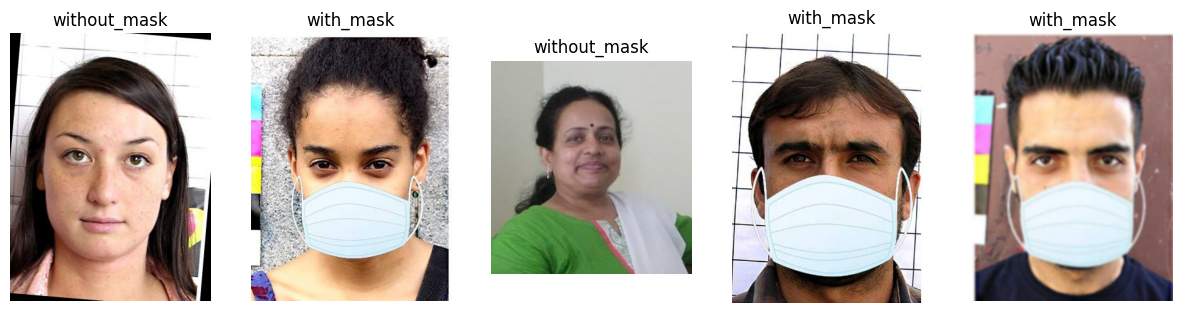

In [ ]:
import cv2
import matplotlib.pyplot as plt
import random

def visualize_images(dataset, labels, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        index = random.randint(0, len(dataset) - 1)
        image_path = dataset[index]
        label = labels[index]


        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image)
        plt.title(label)
        plt.axis('off')

    plt.show()


visualize_images(X_train, y_train)


Design a Convolutional Neural Network (CNN) Modelusing AveragePooling2D, Flatten, Dense, and Dropout layers oHint:Use MobileNetv2 as the base model




Compile the Modelusing Adam optimizer, Binary Crossentropy loss, and accuracy metric functions

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D ,Conv2D, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import BatchNormalization

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)

class_weights = {i: weight for i, weight in enumerate(class_weights)}
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

from tensorflow.keras.layers import Dense, Reshape
model = Sequential()
model.add(base_model)
model.add(AveragePooling2D(pool_size=(7, 7)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model.summary()



9406464/9406464 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 average_pooling2d (Average  (None, 1, 1, 1280)        0         
 Pooling2D)                                                      
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 50)                64050     
                                                           

Train the Modelfor 30 epochs oHint: Use EarlyStopping Callback to terminate the training if there is no improvement in the monitor performance measure of your choicefor certain epochs in a row


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

model = models.Sequential([
    layers.Flatten(input_shape=(224, 224, 3)),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = img_array.reshape((1, 224, 224, 3))
    img_array = preprocess_input(img_array)
    return img_array

X_train_preprocessed = [preprocess_image(image_path) for image_path in X_train]
X_test_preprocessed = [preprocess_image(image_path) for image_path in X_test]

X_train_preprocessed = np.vstack(X_train_preprocessed)
X_test_preprocessed = np.vstack(X_test_preprocessed)

encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train_preprocessed,
    y_train_encoded,
    batch_size=32,
    epochs=30,
    validation_data=(X_test_preprocessed, y_test_encoded),
    callbacks=[early_stopping]
)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
35/35 [==============================] - 7s 41ms/step - loss: 11.8940 - accuracy: 0.8109 - val_loss: 7.0549 - val_accuracy: 0.8406
Epoch 2/30
35/35 [==============================] - 1s 30ms/step - loss: 3.0848 - accuracy: 0.8845 - val_loss: 2.6343 - val_accuracy: 0.9203
Epoch 3/30
35/35 [==============================] - 1s 29ms/step - loss: 1.2047 - accuracy: 0.9309 - val_loss: 1.8164 - val_accuracy: 0.9420
Epoch 4/30
35/35 [==============================] - 1s 29ms/step - loss: 1.4071 - accuracy: 0.9527 - val_loss: 2.6154 - val_accuracy: 0.9493
Epoch 5/30
35/35 [==============================] - 1s 23ms/step - loss: 1.4593 - accuracy: 0.9655 - val_loss: 1.5539 - val_accuracy: 0.9275
Epoch 6/30
35/35 [==============================] - 1s 20ms/step - loss: 1.3398 - accuracy: 0.9482 - val_loss: 2.4240 - val_accuracy: 0.9384
Epoch 7/30
35/35 [==============================] - 1s 29ms/step - loss: 1.1761 - accuracy: 0.9545 - val_loss: 3.0991 - val_accuracy: 0.9565
Epoch 8/30
3

Plot the training history using the Tensorflow History object returned by model.fit

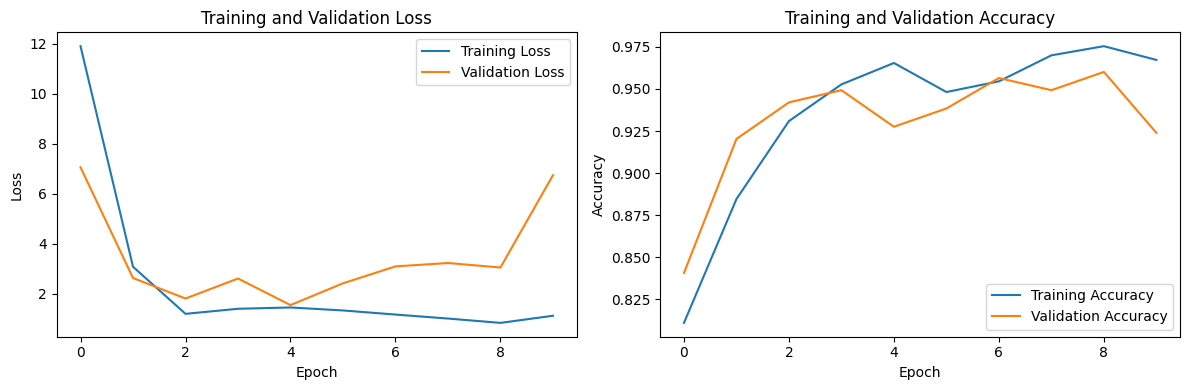

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Evaluate the Model using model.evaluate method

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


9/9 [==============================] - 0s 12ms/step - loss: 1.5539 - accuracy: 0.9275
Test Loss: 1.5539
Test Accuracy: 0.9275


In [ ]:
y_pred = model.predict(X_test_preprocessed)
print(y_pred)

predicted_labels = np.argmax(y_pred, axis=1)


true_labels = np.argmax(y_test_encoded, axis=1)
print(true_labels)

9/9 [==============================] - 0s 17ms/step
[[4.87954682e-03 9.95120466e-01]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 0.00000000e+00]
 [1.27224412e-10 1.00000000e+00]
 [8.58807471e-03 9.91411924e-01]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [1.59735749e-20 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [5.43215792e-05 9.99945641e-01]
 [7.93046202e-05 9.99920726e-01]
 [1.60992503e-01 8.39007437e-01]
 [1.00000000e+00 0.00000000e+00]
 [9.80643630e-01 1.93563886e-02]
 [1.00000000e+00 7.04892923e-25]
 [6.01541949e-03 9.93984640e-01]
 [1.00000000e+00 0.00000000e+00]
 [5.35755515e-01 4.64244455e-01]
 [1.00000000e+00 5.44277392e-25]
 [1.00000000e+00 1.04442573e-10]
 [3.00298468e-03 9.96996999e-01]
 [3.53991518e-23 1.00000000e+00]
 [1.00000000e+00 4.95840646e-10]
 [3.94429006e-02 9.60557163e-01]
 [6.93963766e-35 1.00000000e+00]
 [1.00000000e+00 0.00000000e+00]
 [1.75283824e-17 1.00000000e+00]
 [1.00000000e+00 0.00000000e+00]
 [8.49213153e-02 9.15078

Save the Entire Model using model.save



Note:To save the entire model that includes the model’s architecture, weights, and training configuration, you must use the model.savemethod. If you only want to save the weights of a model, you can use the model.save_weightsmethod

In [ ]:
model.save('/content/model_facemask.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save_weights('/content/model_facemask_weight.h5')

In [ ]:
import cv2
import numpy as np
from keras.models import load_model

In [ ]:
model=load_model("./model_facemask.h5")

In [ ]:
labels_dict={0:'without mask',1:'mask'}
color_dict={0:(0,0,255),1:(0,255,0)}


Now that you have trained the model, test it using a webcam using OpenCV, and detect the Face Masks in real-time


(Used code snippet of Javascript of Google Collab to run the webcam as without it, it was not working)

In [ ]:
size = 4
webcam = cv2.VideoCapture(0)


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
classifier = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')


<IPython.core.display.Javascript object>

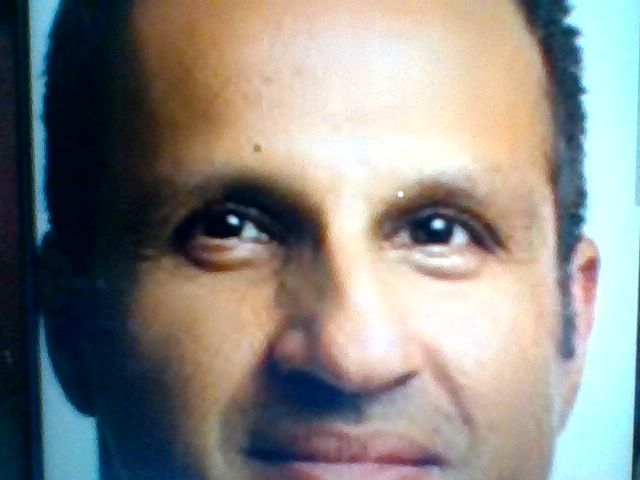

1/1 [==============================] - 0s 48ms/step


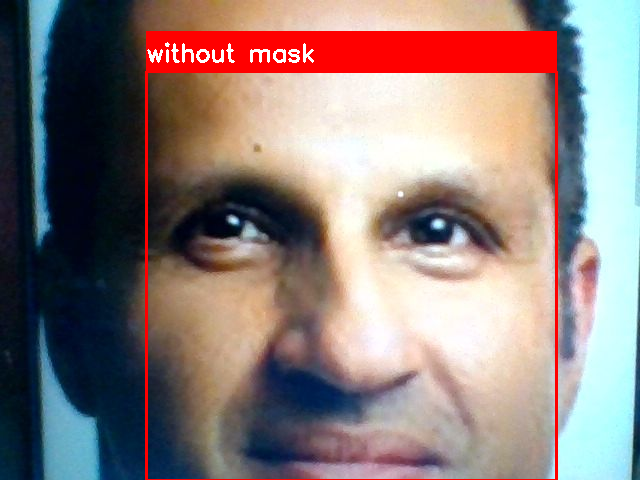

In [ ]:
import cv2
import numpy as np
from keras.models import load_model
from google.colab.patches import cv2_imshow

model = load_model("/content/model_facemask.h5")

labels_dict = {0: 'without mask', 1: 'mask'}
color_dict = {0: (0, 0, 255), 1: (0, 255, 0)}

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({ video: true });

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename


photo_path = take_photo()

img = cv2.imread(photo_path)
cv2_imshow(img)

custom_xml_path = "/content/haarcascade_frontalface_default.xml"

face_cascade = cv2.CascadeClassifier(custom_xml_path)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

for (x, y, w, h) in faces:

    face = img[y:y + h, x:x + w]

    face = cv2.resize(face, (224, 224))
    face = face / 255.0
    face = np.reshape(face, (1, 224, 224, 3))

    result = model.predict(face)
    label = np.argmax(result, axis=1)[0]

    cv2.rectangle(img, (x, y), (x + w, y + h), color_dict[label], 2)
    cv2.rectangle(img, (x, y - 40), (x + w, y), color_dict[label], -1)
    cv2.putText(img, labels_dict[label], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
